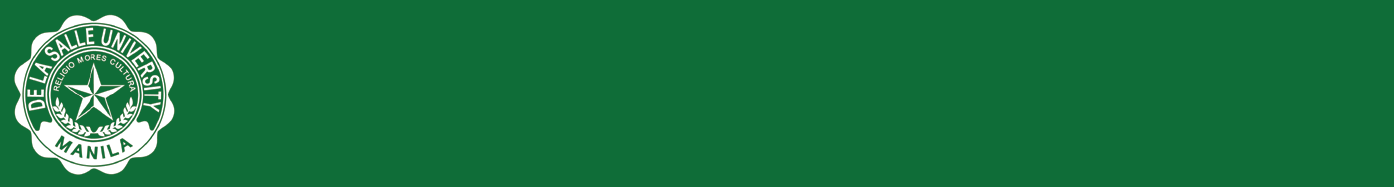

# <center>DATA ENGINEERING AND CLOUD TECHNOLOGIES </center>

---
### Creating Normalized Tables (Music Library Example)

**Prepared by:** Cesar P. Malenab Jr.

**Date created:** October 14, 2022

---

## Introduction



Organizing information in a relational database requires eliminating redundancy to maintain the integrity and consistency of data. If left unchecked in the initial stages of project development, this could result in serious ramifications in terms of performance and waste of resources. For instance, if there is only a single table to store the entire data set then the program has to do a full database scan even for queries that require only a few records. Moreover, if data is repeated over several rows, a single error can cause erroneous data or potential loss of information.

An IBM computer scientist named Edward F. Codd introduced **database normalization** in his paper entitled <a href="https://www.seas.upenn.edu/~zives/03f/cis550/codd.pdf">A Relational Model of Data for Large Shared Data Banks</a>. Database normalization is the removal of duplication and minimizing redundancies through a cumulative process called *normal forms*. 

The objectives of this notebook are the following:

1. Demonstrate the normalization process through a sample music library database.
2. Present and discuss each *normal form* supplemented by python code and psycopg2 library to manipulate the PostgreSQL database. 
3. Define concepts behind database normalization to better understand the theoretical foundation of the topic.
4. Complement the normalized database using an *Entity-Relationship Diagram*.
5. Identify possible trade-offs and implications of normalizing a database.


## Code Design

A music library is used as a sample database to be normalized in this exercise. The initial table contains five columns: `album_id`, `album_name`, `artist_name`, `year`, and `list_of_songs`.

The following are the assumptions about the music library:

- Initial records in the library are songs of `The Beatles` but songs from other artists may also be included in the database.
- A song can only come from one album. Likewise, an album can only come from a single artist.

With these assumptions, the following sections present the step-by-step process of database normalization.

Note: The codes presented in the succeeding sections are within the Try and Except statements to easily discern which among the line of codes caused the error, if any.

### Step 0: Non-normal Database

The following lines of code import the `psycopg2` library and establish a connection to PostgreSQL database. Autocommit is set to True for immediate reflection in the database and the variable `cur` serves as an iterator inside the database.

In [3]:
import psycopg2
conn = psycopg2.connect('host = 127.0.0.1 dbname = mfg717m_lab2db user = Cesar_Malenab password = lab1')
conn.set_session(autocommit = True)
cur = conn.cursor()

A database named `music_library` is created as an example to demonstrate the normalization process for relational databases. The current database is composed of a single table that stores pieces of information including `album_id`, `album_name`, `artist_name`, `year`, and `list_of_songs`.

In [2]:
try:
    cur.execute("CREATE TABLE IF NOT EXISTS music_library (album_id int, album_name varchar, artist_name varchar, year int, songs text[]);")
    
except psycopg2.Error as e:
    print ("Error: Issue creating table")
    print (e)

The data inserted in the table are some of the albums by the band `The Beatles` where a number of songs are contained within an ARRAY datatype.

In [3]:
try:
    cur.execute ("INSERT INTO music_library (album_id, album_name, artist_name, year, songs) VALUES (%s, %s, %s, %s, %s)", \
                    (1, "Rubber Soul", "The Beatles", 1965, ["Michelle", "Think For Yourself", "In My Life"]))
    
except psycopg2.Error as e:
    print ("Error: Inserting Rows")
    print (e)
    
try:
    cur.execute ("INSERT INTO music_library (album_id, album_name, artist_name, year, songs) VALUES (%s, %s, %s, %s, %s)", \
                    (2, "Let it Be", "The Beatles", 1970, ["Let It Be", "Across the Universe"]))
    
except psycopg2.Error as e:
    print ("Error: Inserting Rows")
    print (e)

The code below displays the inserted data using the SELECT statement together with the `fetchone()` method. 


In [6]:
try:
    cur.execute("SELECT * FROM music_library")
    
except psycopg2.Error as e:
    print ("Error: select *")
    print (e)
    
row=cur.fetchone()
while row:
    print(row)
    row=cur.fetchone()    

(1, 'Rubber Soul', 'The Beatles', 1965, ['Michelle', 'Think For Yourself', 'In My Life'])
(2, 'Let it Be', 'The Beatles', 1970, ['Let It Be', 'Across the Universe'])


It can be observed that the database stores the data redundantly which compromises data integrity and may cause performance and maintenance issues (Teorey et al., 2011). The `songs` column stores redundant data horizontally by storing multiple pieces of information appearing in a single row. The normalization process presented in succeeding sections will eliminate these issues that would result in a more efficient and reliable database.

As such, the music_library table is removed from the database using the DROP command in preparation for the database normalization.

In [7]:
cur.execute("drop table music_library")

### Step 1A: First Normal Form

For a relational database table to be in *first normal form (1NF)* each column should hold at most one value for each row in the table. The process is called *atomising* the data where a single piece of data is located in a particular data field (Dunlap, 2006). 


Moreover, a database table in *1NF* should have a *primary key* which serves as an identifier of each instance of a row in a table. The *primary key* can be composed of a single or composite attribute that uniquely determines all other non-key attributes in the table. 

The next lines of codes create a `music_library2` table which is an improvement of the `music_library` table from the previous section. The same set of columns is retained but the `song` attribute datatype is now modified from an ARRAY to a VARCHAR. This guarantees that only a single value can be stored within a data field. 

In [9]:
try:
    cur.execute("CREATE TABLE IF NOT EXISTS music_library2 (album_id int, album_name varchar, artist_name varchar, year int, song_name varchar);")

except psycopg2.Error as e:
    print ("Error: Issue creating table")
    print (e)

Instead of inserting the songs of a certain album in a single row, songs are now appended individually which satisfies the requirement of *first normal form*.

In [10]:
try:
    cur.execute ("INSERT INTO music_library2 (album_id, album_name, artist_name, year, song_name) VALUES (%s, %s, %s, %s, %s)", \
                    (1, "Rubber Soul", "The Beatles", 1965, "Michelle"))
    
except psycopg2.Error as e:
    print ("Error: Inserting Rows")
    print (e)
    
try:
    cur.execute ("INSERT INTO music_library2 (album_id, album_name, artist_name, year, song_name) VALUES (%s, %s, %s, %s, %s)", \
                    (1, "Rubber Soul", "The Beatles", 1965, "Think For Yourself"))
    
except psycopg2.Error as e:
    print ("Error: Inserting Rows")
    print (e)
    
try:
    cur.execute ("INSERT INTO music_library2 (album_id, album_name, artist_name, year, song_name) VALUES (%s, %s, %s, %s, %s)", \
                    (1, "Rubber Soul", "The Beatles", 1965, "In My Life"))
    
except psycopg2.Error as e:
    print ("Error: Inserting Rows")
    print (e)
    
try:
    cur.execute ("INSERT INTO music_library2 (album_id, album_name, artist_name, year, song_name) VALUES (%s, %s, %s, %s, %s)", \
                    (2, "Let it Be", "The Beatles", 1970, "Let It Be"))
    
except psycopg2.Error as e:
    print ("Error: Inserting Rows")
    print (e)
    
try:
    cur.execute ("INSERT INTO music_library2 (album_id, album_name, artist_name, year, song_name) VALUES (%s, %s, %s, %s, %s)", \
                    (2, "Let it Be", "The Beatles", 1970, "Across The Universe"))
    
except psycopg2.Error as e:
    print ("Error: Inserting Rows")
    print (e)
    


Similarly, `music_library2` is extracted from the PostgreSQL database for investigation.

In [11]:
try:
    cur.execute("SELECT * FROM music_library2")
    
except psycopg2.Error as e:
    print ("Error: select *")
    print (e)
    
row=cur.fetchone()
while row:
    print(row)
    row=cur.fetchone()

(1, 'Rubber Soul', 'The Beatles', 1965, 'Michelle')
(1, 'Rubber Soul', 'The Beatles', 1965, 'Think For Yourself')
(1, 'Rubber Soul', 'The Beatles', 1965, 'In My Life')
(2, 'Let it Be', 'The Beatles', 1970, 'Let It Be')
(2, 'Let it Be', 'The Beatles', 1970, 'Across The Universe')


It is now evident that there are no horizontal redundancies in the table since each song is represented uniquely in each row. In addition, the `songs` column serves as the *primary key* for the current table since knowing a specific song can help identify every other field in the row (i.e. `album_id`, `album_name`, `artist_name`, and `year`).

### Step 1B: First Normal Form

Remember that a music library database is being created and not a database for the songs of `The Beatles`. This means that if another artist is added in `music_library2` with the same song name (e.g. In My Life by Patti Austin), this would result in duplicate *primary keys* which is undesirable. A *primary key* should be UNIQUE and NOT NULL to identify each row in a table. 

Hence, an improvement of music_library2 is the addition of a `song_id` column which will serve as the *primary key* to avoid irregularities of having songs with the same title. The codes below run the command to add the `song_id` column in the table.

In [12]:
query_song_id = "ALTER TABLE music_library2 ADD COLUMN song_id SERIAL;"
cur.execute(query_song_id)

In [13]:
try:
    cur.execute("SELECT * FROM music_library2")
    
except psycopg2.Error as e:
    print ("Error: select *")
    print (e)
    
row=cur.fetchone()
while row:
    print(row)
    row=cur.fetchone()

(1, 'Rubber Soul', 'The Beatles', 1965, 'Michelle', 1)
(1, 'Rubber Soul', 'The Beatles', 1965, 'Think For Yourself', 2)
(1, 'Rubber Soul', 'The Beatles', 1965, 'In My Life', 3)
(2, 'Let it Be', 'The Beatles', 1970, 'Let It Be', 4)
(2, 'Let it Be', 'The Beatles', 1970, 'Across The Universe', 5)


A consequence of the first normal form is increased vertical redundancy in the database table. Several attributes like `album_id`, `album_name`, `artist_name`, and `year` are all repeating values within the table. This may still cause potential loss of integrity due to several *anomalies* that may be encountered.

Again, music_library2 table is removed for further normalization of the database.

In [14]:
cur.execute("drop table music_library2")

### Step 2A: Second Normal Form

The *second normal form (2NF)* addresses the vertical redundancies in a database by making sure that non-key attributes are dependent entirely on the *primary key* (Dunlap, 2006). The goal of the *second normal form* is to eliminate potential *anomalies* that can occur in the database by providing a single point of access to a specific record. 

Three possible *anomalies* may occur in a relational database during any changes that may be applied in its lifetime:

- **Update Anomaly** - when information is repeated over the database, several updates need to be performed redundantly to maintain consistency in the database. In the case of `music_library2`, if `The Beatles` decided to change the `Rubber Soul` album to say, `Rubber Band`, then the database needs to be updated three times causing a degradation in performance due to repeated updates.


- **Insert Anomaly** - it is common for an artist to release the name of an upcoming album (e.g. Taylor Swift) without giving the full track list yet. It would be difficult to *insert* this new information into `music_library2` since the *primary key* is a `song_id` which cannot be a NULL value. Thus, an insert anomaly is when a non-key attribute is added to a table without a possible *primary key* to identify this instance.

- **Delete Anomaly** - in some instances, an artist may withdraw a song due to controversies or copyright issues. As an example, if `The Beatles` decided to remove `Let It Be` and `Across The Universe` from their discography, then there is a potential loss of data since other attributes (e.g. `album_name` and `year`) will also be deleted and the database will lose all of the information regarding the `Let It Be` album.

Reviewing the attributes of `music_library2` table with `song_id` as *primary key*, it can be identified that `album_name` and `year` refers to the `album_id` column which is not a primary key. Therefore, `music_library2` should be projected into two tables namely, `song_library` and `album_library` ,with `song_id` and `album_id` as *primary keys*, respectively.

In [4]:
try:
    cur.execute("CREATE TABLE IF NOT EXISTS album_library (album_id int, album_name varchar, artist_name varchar, year int);")

except psycopg2.Error as e:
    print ("Error: Issue creating table")
    print (e)
    
try:
    cur.execute("CREATE TABLE IF NOT EXISTS song_library (song_id int, album_id int, song_name varchar);")

except psycopg2.Error as e:
    print ("Error: Issue creating table")
    print (e)

The code below inserts only two rows of record into the `album_library` and the vertical redundancy was reduced since there is only one copy of `album_name` and `year` in the entire database.

In [5]:
try:
    cur.execute ("INSERT INTO album_library (album_id, album_name, artist_name, year) VALUES (%s, %s, %s, %s)", \
                    (1, "Rubber Soul", "The Beatles", 1965))
    
except psycopg2.Error as e:
    print ("Error: Inserting Rows")
    print (e)
    
try:
    cur.execute ("INSERT INTO album_library (album_id, album_name, artist_name, year) VALUES (%s, %s, %s, %s)", \
                    (2, "Let it Be", "The Beatles", 1970))
    
except psycopg2.Error as e:
    print ("Error: Inserting Rows")
    print (e)
           

Similarly, individual songs are inserted into the `song_library` and the `album_id` attribute was retained in the table to maintain the relationship instance between a song and an album. The `album_id` serves as a *foreign key* which reference the `album_id` *primary_key* in `album_library`. With this, JOIN statements can be constructed to display data from both tables in a single query.

In [6]:
try:
    cur.execute ("INSERT INTO song_library (song_id, album_id, song_name) VALUES (%s, %s, %s)", \
                    (1, 1, "Michelle"))
    
except psycopg2.Error as e:
    print ("Error: Inserting Rows")
    print (e)
                     
try:
    cur.execute ("INSERT INTO song_library (song_id, album_id, song_name) VALUES (%s, %s, %s)", \
                    (2, 1, "Think For Yourself"))
    
except psycopg2.Error as e:
    print ("Error: Inserting Rows")
    print (e)
                     
try:
    cur.execute ("INSERT INTO song_library (song_id, album_id, song_name) VALUES (%s, %s, %s)", \
                    (3, 1, "In My Life"))
    
except psycopg2.Error as e:
    print ("Error: Inserting Rows")
    print (e)
                     
try:
    cur.execute ("INSERT INTO song_library (song_id, album_id, song_name) VALUES (%s, %s, %s)", \
                    (4, 2, "Let It Be"))
    
except psycopg2.Error as e:
    print ("Error: Inserting Rows")
    print (e)
                     
try:
    cur.execute ("INSERT INTO song_library (song_id, album_id, song_name) VALUES (%s, %s, %s)", \
                    (5, 2, "Across The Universe"))
    
except psycopg2.Error as e:
    print ("Error: Inserting Rows")
    print (e)

The following SELECT statements display the `album_library` and `song_library` tables.

In [7]:
print("\nTable: album_library\n")
try:
    cur.execute("SELECT * FROM album_library")
    
except psycopg2.Error as e:
    print ("Error: select *")
    print (e)
    
row=cur.fetchone()
while row:
    print(row)
    row=cur.fetchone()


Table: album_library

(1, 'Rubber Soul', 'The Beatles', 1965)
(2, 'Let it Be', 'The Beatles', 1970)


In [8]:
print("\nTable: song_library\n")
try:
    cur.execute("SELECT * FROM song_library")
    
except psycopg2.Error as e:
    print ("Error: select *")
    print (e)
    
row=cur.fetchone()
while row:
    print(row)
    row=cur.fetchone()


Table: song_library

(1, 1, 'Michelle')
(2, 1, 'Think For Yourself')
(3, 1, 'In My Life')
(4, 2, 'Let It Be')
(5, 2, 'Across The Universe')


To demonstrate that the database essentially remains unchanged after projecting `music_library2` into two tables, the JOIN statement below displays the `song_library` and `album_library` side-by-side similar to the `music_library2`.

In [9]:
try:
    cur.execute("SELECT * FROM album_library JOIN\
                song_library ON album_library.album_id = song_library.album_id ;")
except psycopg2.Error as e:
    print ("Error: select *")
    print (e)
    
row=cur.fetchone()
while row:
    print(row)
    row=cur.fetchone()

(1, 'Rubber Soul', 'The Beatles', 1965, 1, 1, 'Michelle')
(1, 'Rubber Soul', 'The Beatles', 1965, 2, 1, 'Think For Yourself')
(1, 'Rubber Soul', 'The Beatles', 1965, 3, 1, 'In My Life')
(2, 'Let it Be', 'The Beatles', 1970, 4, 2, 'Let It Be')
(2, 'Let it Be', 'The Beatles', 1970, 5, 2, 'Across The Universe')


Reducing the vertical redundancy in a database by applying the rules of *second normal form*, results mainly in the increased integrity of data. Consequently, a single table was projected into two *entities* and a JOIN query is now needed to obtain pieces of information from the database. Thus, it can be recognized that increased normalization of a database results in longer query periods due to the JOIN statements required for multiple *entities/tables*.

### Step 2B: Second Normal Form

It is common for an artist to release numerous albums throughout their career. Reviewing the `album_library`, it can be observed that `artist_name` is also a repeating value within the table. This condition is prone to *update anomaly* as mentioned in the previous section. To further improve the database, a new entity can be added named `artist_library` assigned with its own `artist_id` *primary key* to remove the redundancy in the `album_library`.

The addition of the `artist_library` will be demonstrated in the next section since this step will also result in achieving *third normal form* of the database. 

For now, the two current tables are deleted in preparation for the projection of the music library into three tables. 

In [10]:
cur.execute("drop table album_library")
cur.execute("drop table song_library")

### Step 3A: Third Normal Form

To achieve *third normal form*, each attribute should be fully dependent on the primary key such that no *transitive dependencies* exist within a table. As a means to elaborate on *transitive dependency*, *functional dependency* is first defined as a way of determining other attributes using one or more attributes. In `music_library2`, functional dependencies can be shown by the following:

- song_id -> song_name
- album_id -> album_name, year, artist_name

For example, if the database will also include the *year of debut* of each artist which refers to the artist's first public appearance, then by default the new attribute is added in the `album_library` since this is where the `artist_name` is located. Showing the functional dependency of `album_library`:

- album_id -> album_name, year, artist_name -> year_of_debut

The attribute *year_of_debut* is functionally dependent on `artist_name` and `artist_name` is functionally dependent on the *primary key*, `album_id`. This implies that *year_of_debut* is *transitively dependent* on `album_id`.

In addition to the reason stated in Step 2B, a new entity should be constructed called `artist_library` to prevent future *transitive dependencies* that may exist in the database. The existence of *transitive dependency* means two separate pieces of information are represented in a single table (Teorey et al., 2011).



Similar to the above demonstrations, the next lines of codes create three tables in the database namely, `album_library`, `song_library`, and `artist_library`. 

In [11]:
try:
    cur.execute("CREATE TABLE IF NOT EXISTS album_library (album_id int, album_name varchar, artist_id int, year int);")

except psycopg2.Error as e:
    print ("Error: Issue creating table")
    print (e)
    
try:
    cur.execute("CREATE TABLE IF NOT EXISTS song_library (song_id int, album_id int, song_name varchar);")

except psycopg2.Error as e:
    print ("Error: Issue creating table")
    print (e)
    
try:
    cur.execute("CREATE TABLE IF NOT EXISTS artist_library (artist_id int, artist_name varchar);")

except psycopg2.Error as e:
    print ("Error: Issue creating table")
    print (e)

The values inserted into the `album_library` is now updated such that it contains the *foreign key* `artist_id` instead of the `artist_name` attribute.

In [16]:
try:
    cur.execute ("INSERT INTO album_library (album_id, album_name, artist_id, year) VALUES (%s, %s, %s, %s)", \
                    (1, "Rubber Soul", 1, 1965))
    
except psycopg2.Error as e:
    print ("Error: Inserting Rows")
    print (e)
    
try:
    cur.execute ("INSERT INTO album_library (album_id, album_name, artist_id, year) VALUES (%s, %s, %s, %s)", \
                    (2, "Let it Be", 1, 1970))
    
except psycopg2.Error as e:
    print ("Error: Inserting Rows")
    print (e)

The INSERT statements below for the `song_library` are the same as the previous section but a modification is discussed in Step 3B to improve query speed. 

In [14]:
try:
    cur.execute ("INSERT INTO song_library (song_id, album_id, song_name) VALUES (%s, %s, %s)", \
                    (1, 1, "Michelle"))
    
except psycopg2.Error as e:
    print ("Error: Inserting Rows")
    print (e)
                     
try:
    cur.execute ("INSERT INTO song_library (song_id, album_id, song_name) VALUES (%s, %s, %s)", \
                    (2, 1, "Think For Yourself"))
    
except psycopg2.Error as e:
    print ("Error: Inserting Rows")
    print (e)
                     
try:
    cur.execute ("INSERT INTO song_library (song_id, album_id, song_name) VALUES (%s, %s, %s)", \
                    (3, 1, "In My Life"))
    
except psycopg2.Error as e:
    print ("Error: Inserting Rows")
    print (e)
                     
try:
    cur.execute ("INSERT INTO song_library (song_id, album_id, song_name) VALUES (%s, %s, %s)", \
                    (4, 2, "Let It Be"))
    
except psycopg2.Error as e:
    print ("Error: Inserting Rows")
    print (e)
                     
try:
    cur.execute ("INSERT INTO song_library (song_id, album_id, song_name) VALUES (%s, %s, %s)", \
                    (5, 2, "Across The Universe"))
    
except psycopg2.Error as e:
    print ("Error: Inserting Rows")
    print (e)

`Artist_name` attribute is now in the `artist_library` table with `artist_id` as *primary key* shown in the code below.

In [15]:
try:
    cur.execute ("INSERT INTO artist_library (artist_id, artist_name) VALUES (%s, %s)", \
                    (1, "The Beatles"))
    
except psycopg2.Error as e:
    print ("Error: Inserting Rows")
    print (e)

The three tables are displayed below to verify that CREATE TABLE and INSERT statements are successfully reflected in the PostgreSQL database.

In [17]:
print("\nTable: album_library\n")
try:
    cur.execute("SELECT * FROM album_library")
    
except psycopg2.Error as e:
    print ("Error: select *")
    print (e)
    
row=cur.fetchone()
while row:
    print(row)
    row=cur.fetchone()


Table: album_library

(1, 'Rubber Soul', 1, 1965)
(2, 'Let it Be', 1, 1970)


In [18]:
print("\nTable: song_library\n")
try:
    cur.execute("SELECT * FROM song_library")
    
except psycopg2.Error as e:
    print ("Error: select *")
    print (e)
    
row=cur.fetchone()
while row:
    print(row)
    row=cur.fetchone()


Table: song_library

(1, 1, 'Michelle')
(2, 1, 'Think For Yourself')
(3, 1, 'In My Life')
(4, 2, 'Let It Be')
(5, 2, 'Across The Universe')


In [19]:
print("\nTable: artist_library\n")
try:
    cur.execute("SELECT * FROM artist_library")
    
except psycopg2.Error as e:
    print ("Error: select *")
    print (e)
    
row=cur.fetchone()
while row:
    print(row)
    row=cur.fetchone()


Table: artist_library

(1, 'The Beatles')


The multiple JOIN statements below show that after normalizing the database into *third normal form*, the data can still be presented similarly to the original database (Step 0: Non-normal Database). The main difference now is that redundancies are no longer present and data integrity and consistency have been immensely improved.

In [20]:
query = """
        SELECT song_id, song_name, album_name, year, artist_name
        FROM song_library
        JOIN album_library
        ON song_library.album_id = album_library.album_id
        JOIN artist_library
        ON album_library.artist_id = artist_library.artist_id
        """

cur.execute(query)

print("\nTable: music_library\n")
row=cur.fetchone()
while row:
    print(row)
    row=cur.fetchone()


Table: music_library

(1, 'Michelle', 'Rubber Soul', 1965, 'The Beatles')
(2, 'Think For Yourself', 'Rubber Soul', 1965, 'The Beatles')
(3, 'In My Life', 'Rubber Soul', 1965, 'The Beatles')
(4, 'Let It Be', 'Let it Be', 1970, 'The Beatles')
(5, 'Across The Universe', 'Let it Be', 1970, 'The Beatles')


### STEP 3B: Third Normal Form

Compared to Step 2A, Step 3A resulted in the projection of `music_library` database into three tables. Moreover, a more complex JOIN statement was needed to show the entire information contained in the database. This added complexity will again result in longer query times since the program has to evaluate complicated query statements, hence, affecting application performance.

Given a query where `song_name` and `artist_name` are the only attributes needed, the program still needs to do a full scan of the entire database since the connection of each table goes from song_library (album_id) -> album_library(album_id, artist_id) -> artist_library (artist_id). Therefore, an instance of the relationship between `song_library` and `artist_library` can be better shown if `artist_id` is included in the `song_library` as a *foreign key*. This way, only a single JOIN statement is needed and the program will only scan two tables, improving query performance.

The query below adds the `artist_id` column in the `song_library` table.

In [21]:
query_alter = "ALTER TABLE song_library ADD COLUMN artist_id INT;"

cur.execute(query_alter)

Then, the values for `artist_id` in `song_library` are updated correspondingly.

In [23]:
query_update = """
               UPDATE song_library
               SET artist_id = 1
               WHERE song_id IN (1,2,3,4,5);
               """

cur.execute(query_update)

The code below shows the modified `song_library` table.

In [24]:
print("\nTable: song_library\n")
try:
    cur.execute("SELECT * FROM song_library")
    
except psycopg2.Error as e:
    print ("Error: select *")
    print (e)
    
row=cur.fetchone()
while row:
    print(row)
    row=cur.fetchone()


Table: song_library

(1, 1, 'Michelle', 1)
(2, 1, 'Think For Yourself', 1)
(3, 1, 'In My Life', 1)
(4, 2, 'Let It Be', 1)
(5, 2, 'Across The Universe', 1)


## Analysis of Results

The previous section demonstrated database normalization through a step-by-step progression using *normal forms*. The normalization process resulted in three entities identified by their respective *primary keys* and connected by *foreign keys*. The figure below presents the Entity-Relationship Diagram (ERD) of the music_library database after the normalization process. 

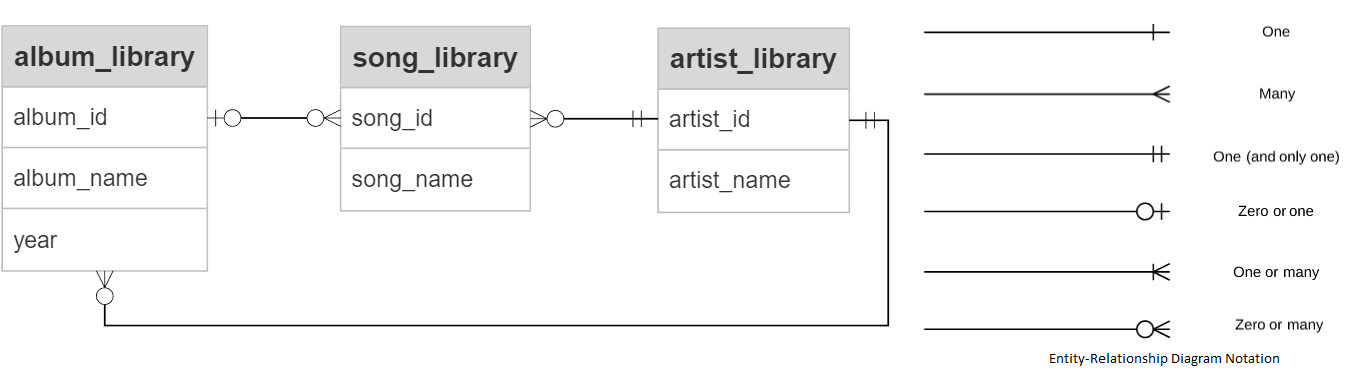

The Crow's Foot notation defines the relationship between entities. In a one-to-many relationship, the *primary key* comes from the *many* side as this will be unique in each instance while the *one* side will just be repeated throughout. For example, one artist can have many songs but a song can only be performed by one artist. Likewise, an album can contain many songs but a song can come from one or zero album. In both relationships, the song is on the many side which validates the final database where the `song_library` has `song_id` as its *primary key* with `album_id` and `artist_id` as *foreign keys*. Using the *functional dependency* notation:

- Intra-entity dependency: song_id -> song_name
- Inter-entity dependency: song_id -> album_id (one-to-many), song_id -> artist_id (one-to-many)

Therefore, the `song_library` table can be composed of attributes on the right side of the *functional dependencies* listed above.

In summary, the following are steps of database normalization from *first normal form to the third normal form*:

**First Normal Form**:
- Remove horizontal redundancy by making sure that each cell contains only single-valued data (i.e. *atomising*).

- Identify each instance of a row by assigning an attribute as *primary key*. The *primary key* should be **unique** and it is a good practice to create an **ID** column with an integer datatype in the table.

**Second Normal Form**:
- All the conditions of *first normal form* should be satisfied.

- Remove possible *insert*,*update*, and *delete* anomalies in the database by identifying non-key attributes that are not fully dependent on the *primary key*.

- Project the database into several tables, as needed, to remove vertical redundancies and have a single point of access for each data.

**Third Normal Form**
- All the conditions of *second normal form* should be satisfied.

- Eliminate *transitive dependencies* by identifying *functional dependencies* between attributes. 

- Restructure the database, as needed, to address the presence of *transitive dependencies* in the database. 

## Conclusion

Database normalization is a critical part of the development of a relational database model. The normalization process is a set of rules called *normal forms* to remove duplication and minimize any possible scenario that can undermine data integrity and consistency. This notebook presented an example database where issues were identified at every step and appropriate actions were made as exhibited in the line of codes. Concepts such as *primary key*, *foreign key*, *functional dependency*, and possible *anomalies* were discussed and how they relate to the overall database design. An Entity-Relationship Diagram also showed the final database schema after the normalization process.

Implications of normalization such as complex query statements and longer query performance were demonstrated to show the impact of database normalization in applications or business operations. This means that there is only an optimum level of normalization whereby the overall performance is not compromised for the sake of data integrity and consistency. Ultimately, the data engineer should analyze the potential benefits of normalizing data since the process could have diminishing returns. 


---

## References

- Dunlap, I. H. (2006). Database design and normalisation. In *Open source database driven web development: A guide for information professionals*. Chandos Publishing. 

- Teorey, T. J. (2011). Normalization. In *Database modeling and design: Logical design*. Elsevier. 
 